# k-Nearest-Neighbours classifier 

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### Load the Iris data set

In [2]:
iris = datasets.load_iris()
print('Keys:         ', iris.keys())           
print('Features:     ', iris.feature_names)    # .features shows the name columns
print('Target names: ', iris.target_names)     # .target_names show the labels
print('Targets:      ', iris.target)           

Keys:          dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Features:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Targets:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Legend: 0 means setosa; 1 means versicolor; 2 means virginica;

In [3]:
species = dict( zip( np.unique(iris.target), iris.target_names ) ) 
for i in range(len(species)):
    print('%d means %s' %(i,species[i]))
#endfor

0 means setosa
1 means versicolor
2 means virginica


### Create a pandas dataframe with iris data and iris target

In [4]:
# create dataframe
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Pair plots of the iris dataset
Let us plot all pairs of iris data points (that is, pairs of columns). 
Data are coloured according to the species (setosa, versicolor, virginica) the iris belongs to. 
In the plot below, **violet denotes setosa**, **green denotes versicolor**, and **yellow denotes virginica**.

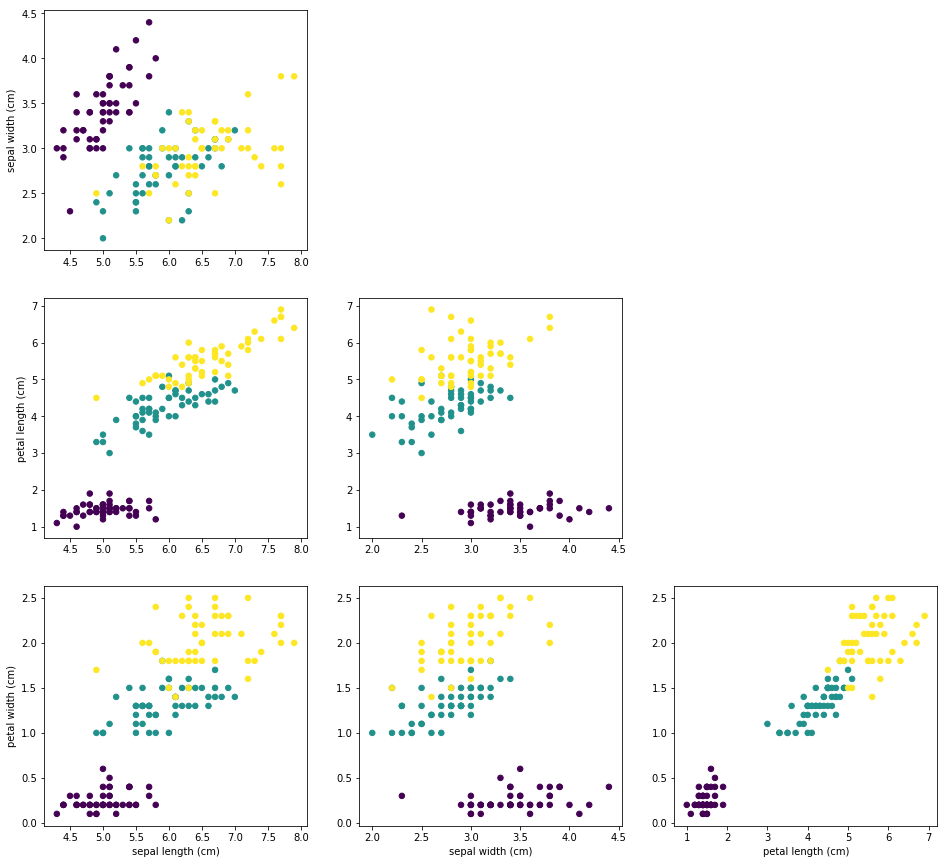

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(16, 15))
#plt.suptitle('Iris pairplot')
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(iris.data[:, j], iris.data[:, i + 1], s=30, marker='o', c=iris.target)
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        #endif
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        #endif
        if j > i:
            ax[i, j].set_visible(False)
        #endif
    #endfor
#endfor

## Train and test datasets
Let us split the iris dataset into two sets, one used to build the model, and the remaining part to test the model.
Use the *train_test_split* function with default values (75% for the train set, 25% of the test set)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


## kNN classification
For a given new data point, the 1-NN algorithm finds the point in the (training) data set which is closest 
to the given point. Then, it simply assigns the label of this closest data point to the given data point.

The $k$ in kNN indicates how many 'closest' data neighbours are used to classify a new data point. That is, 
given a new point, any fixed number of $k$ neighbours in the (training) data set (for example, 
the closest one or the closest five ones) can be considered. Then, the prediction is done using the majority class among these neighbours. 

In [7]:
# number of neighbours
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# using the train data set to build the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

### Prediction 
Suppose we find a new iris flower with the following features:
sepal length **6.1cm**, sepal width **2.3cm**, petal length **1.8cm**, petal width **0.2cm**. 
We want to know which species it belongs to.

In [8]:
X_new = np.array([[6.1, 2.3, 1.8, 0.2]])
prediction = knn.predict(X_new)
print('Prediction: %s' %(species[prediction[0]]))  

Prediction: setosa


The model predicts a setosa iris.

### Plot new data and decision boundaries

In [9]:
# color map for plotting the decision boundaries
cmap = ListedColormap(['#AFEEEE', '#AAFFAA', '#FF8C00'])

# Create a mesh for plot the decision boundaries and assign the predicted values
def createmesh(data,datatrain,k):
    # two-by-two classifier
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(data,datatrain)
    # here, data has 2 columns
    eps = 0.5
    hh  = 0.03 
    x_min, x_max = data[:,0].min() - eps, data[:,0].max() + eps
    y_min, y_max = data[:,1].min() - eps, data[:,1].max() + eps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hh), np.arange(y_min, y_max, hh))
    Z = knn2.predict( np.c_[xx.ravel(), yy.ravel()] )
    Z = Z.reshape(xx.shape)
    return xx, yy, Z
#endfunction

def pairplot_prediction(fulldata, datatest,datatrain, k, *args, **kwargs): 
    # optional parameters
    suptitle = kwargs.get('suptitle', None)
    pred     = kwargs.get('pred', None)
    targpred = kwargs.get('targpred', None)
    boundary = kwargs.get('bound',    1)

    fig, ax = plt.subplots(3, 3, figsize=(16, 13))
    #plt.suptitle(suptitle)

    for i in range(3):
        for j in range(3):
           
            if boundary == 1:
                # plot the decision boundaries for current pairs of data 
                extdata = np.column_stack((datatest[:,j], datatest[:,i+1]))                              
                xx,yy,Z = createmesh(extdata, datatrain, k)
                ax[i,j].pcolormesh(xx, yy, Z, cmap=cmap)  
            #endif 
            
            # plot the current pairs of data of the train set 
            ax[i,j].scatter(datatest[:, j], datatest[:, i+1], s=20, marker='o', c=datatrain)
            
            # check if predicted point(s) have to be plotted as well
            if pred is not None:
                if targpred is None:
                    # plot predicted points
                    ax[i,j].scatter(pred[:,j], pred[:,i+1], s=50, marker='x', color='red')
                else:
                    # plot the test set
                    ax[i,j].scatter(pred[:,j], pred[:,i+1], s=40, marker='o', c=targpred) 
                #endif
            #endif
            
            if i == 2:
                ax[i, j].set_xlabel(fulldata['feature_names'][j])
            #endif
            if j == 0:
                ax[i, j].set_ylabel(fulldata['feature_names'][i + 1])
            #endif
            if j > i:
                ax[i, j].set_visible(False)
            #endif
        #endfor
    #endfor
#endfunction

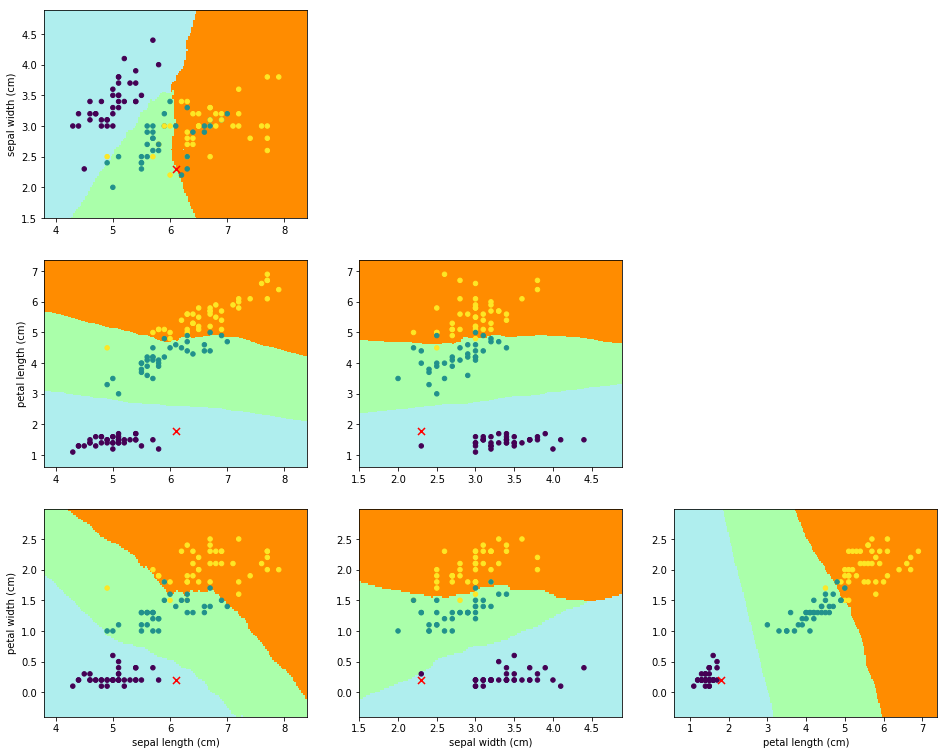

In [10]:
# plot the new point
pairplot_prediction(iris,X_train,y_train,k,pred=X_new,bound=1)

It is clear that if we were only looking at the first two features of iris data set, that is, sepal length and sepal width (the first plot at the top of the above figure) we were likely to predict the new iris instance to be either a versicolor or virginica. And this would have been wrong. From the pair plot above, we clearly see that the new iris data (the red cross) belongs to the setosa species.

## Evaluating the model
We now can evaluate the accuracy of the model that we have built using the train set, by using the test set (for which we know the right species). 

In [11]:
# evaluating the model using X_test
y_pred = knn.predict(X_test)

# compare the prediction with the y_test, i.e., the right target of the iris flowers in the train set:
# compute the accuracy (the fraction of flowers for which the right species was predicted)
print('Accuracy: %f (only %d wrong prediction(s))' %(np.mean(y_pred == y_test), len(np.where(y_pred - y_test))) )

Accuracy: 0.973684 (only 1 wrong prediction(s))


In [12]:
# we can obtain the accuracy above using the score function
knn.score(X_test, y_test)

0.9736842105263158

We see that the test set accuracy is about 0.97, that is, we made the right prediction for 97% of the irises in the test set (in particular, there is only one wrong prediction). 
In general, we can expect the model to be correct 97% of the time for new irises instances. 

In [13]:
wrongplace = np.where(y_pred - y_test)

# find the wrong prediction
wrongpred = y_pred[wrongplace]

# find the associated right species
rightpred = y_test[wrongplace]

print('Wrong prediction:', species[wrongpred[0]])
print('Right species:   ', species[rightpred[0]])

Wrong prediction: virginica
Right species:    versicolor


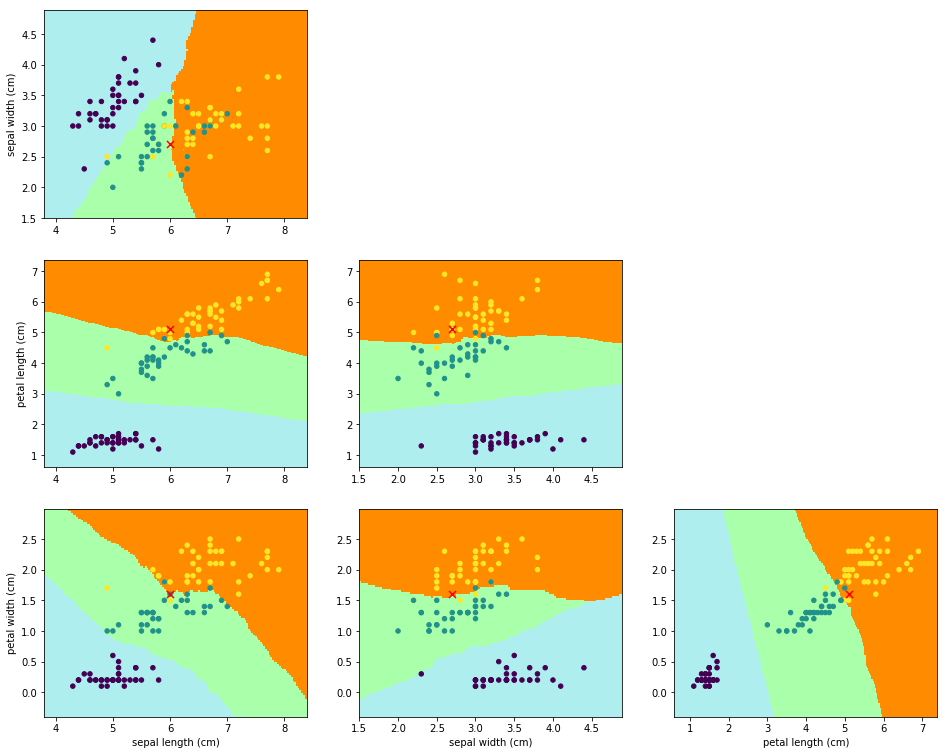

In [14]:
# plot the wrong predicted instance
wrong   = np.array( np.where( y_pred - y_test )  ).flatten()
X_wrong = X_test[wrong,:]
pairplot_prediction(iris,X_train,y_train,k,pred=X_wrong,bound=1)

## Plot the train set

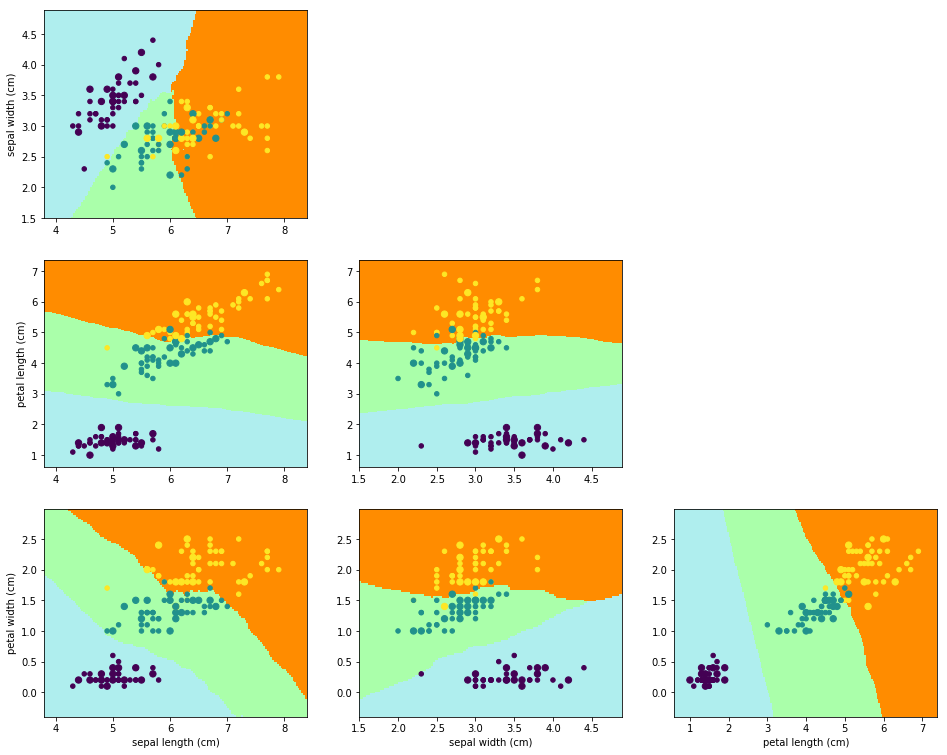

In [15]:
pairplot_prediction(iris,X_train,y_train,k,pred=X_test,targpred=y_test,bound=1)

### Sensitivity of kNN classification: compute the accuracy when the parameter $k$ changes

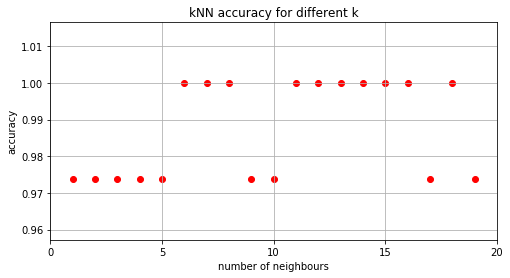

In [17]:
# Fix the train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target) #, random_state=0)

# Set of neighbours
krange = range(1,20)

scores = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # compute current accuracy 
    scores.append(knn.score(X_test, y_test))
#endfor

plt.figure(figsize=(8, 4))
plt.title('kNN accuracy for different k')
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.scatter(krange, scores, marker='o', color='red')
plt.xticks([0,5,10,15,20]);
plt.grid()

### Sensitivity of kNN classification: compute the accuracy when the proportion of test/train sets changes

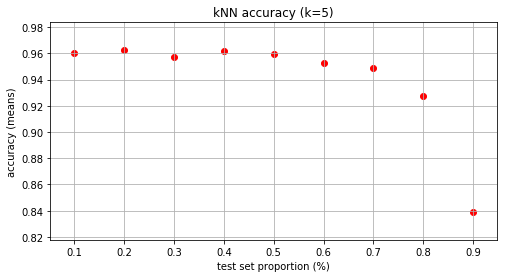

In [18]:
testsize = np.arange(0.1, 1, 0.1) 

# fix the number of neighbours in kNN
k = 5
knn = KNeighborsClassifier(n_neighbors = k)

meansc = []
for ts in testsize:
    scores = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = ts)
        knn.fit(X_train,y_train)
        scores.append( knn.score(X_test, y_test) )
    #endfor
    # get the mean of current vector of scores
    meansc.append( np.mean(scores) )
#endfor
     
plt.figure(figsize=(8, 4))
plt.title('kNN accuracy (k=%d)' %k)
plt.xlabel('test set proportion (%)')
plt.ylabel('accuracy (means)')
plt.scatter(testsize, meansc, marker='o', color='red')
plt.xticks(testsize)
plt.grid()

As expected, on average, we may expect the model to return higher accuracies for high sizes of the train set (i.e., for small sizes of the test sets) 